# Edges and corners detection with Sobel

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [62]:
original = cv2.imread("USMV.jpg", cv2.IMREAD_COLOR)
original_RGB = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

In [64]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

abs_sobel_x = cv2.convertScaleAbs(sobel_x)
abs_sobel_y = cv2.convertScaleAbs(sobel_y)
edges = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

corners = cv2.goodFeaturesToTrack(img, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
corners = np.int0(corners)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 5, 255, -1)

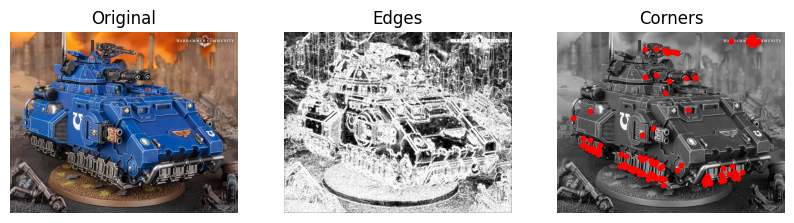

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(10,8))
axs[0].imshow(original_RGB)
axs[0].axis("off")
axs[0].set_title("Original")
axs[1].imshow(edges, cmap=plt.cm.gray)
axs[1].axis("off")
axs[1].set_title("Edges")
axs[2].imshow(img, cmap=plt.cm.gray)
axs[2].scatter(corners[:, 0, 0], corners[:, 0, 1], s=10, c="r", marker="o")
axs[2].axis("off")
axs[2].set_title("Corners")
plt.show()

# HOG methode

In [68]:
from skimage.feature import hog
from skimage import exposure

In [89]:
image = cv2.imread("USMV.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [105]:
hog_features, hog_image = hog(gray, orientations=40, pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2), block_norm="L2-Hys", visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

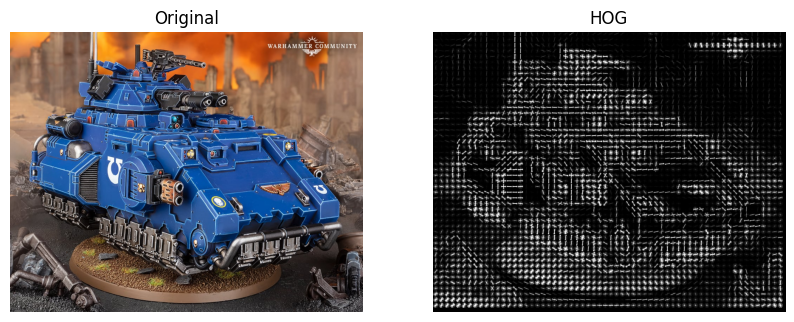

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(10,8))
axs[0].imshow(image)
axs[0].axis("off")
axs[0].set_title("Original")
axs[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
axs[1].axis("off")
axs[1].set_title("HOG")
plt.show()

# CIFAR-10, HOG

In [107]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [109]:
cifar = datasets.fetch_openml("CIFAR_10")

C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
features = []
for image in cifar:
    hog_feat = hog(image, orientations=40, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
    features.append(hog_feat)
features = np.array(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, cifar.target, test_size=0.3, random_state=42)

In [ ]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")